> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDb movie data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

   

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.



> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline





In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

ERROR: Could not find a version that satisfies the requirement pandas==0.25.0
ERROR: No matching distribution found for pandas==0.25.0


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df= pd.read_csv("tmdb-movies.csv")



In [3]:

## to check the number of colummn and rows
df.shape

(10866, 21)

In [4]:
## to check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
## look a the five fisrt row
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [6]:
## to check if there is  missing values  is return a boolean True for NaN 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
## same has isnull
df.isna().values.any()
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
## look for duplicated
df.duplicated().values.any()

True

In [9]:
df.duplicated().sum()

1

In [10]:
# ## Remove duplicated
df1=df.drop_duplicates()
df1.duplicated().values.any()

False

In [11]:
#Drop those NaN value
df.dropna(inplace=True)

In [12]:
# Check info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

In [13]:
# to verify if there is NaN left
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

Firstly, are a lot of unwanted colums which makes understanding the dataset difficult. I start the cleaning from here
 

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [16]:
# check some statiical numerical value
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


We can see that some columns(budget,revenue,runtime,budget_adj,revenue_adj) has zero for min this can be  read has missed value 

In [22]:
# let check random 20 sample of those colummns
df[['budget','revenue','runtime','budget_adj','revenue_adj']].sample(20)

,budget,revenue,runtime,budget_adj,revenue_adj
181,0,0,48,0.000000e+00,0.000000e+00
6196,113000000,850000000,140,1.261717e+08,9.490788e+08
449,0,0,110,0.000000e+00,0.000000e+00
3945,0,0,68,0.000000e+00,0.000000e+00
6380,1000000,13350369,103,1.116563e+06,1.490653e+07
6658,8500000,5480996,100,9.194188e+06,5.928624e+06
1843,3500000,0,101,3.557402e+06,0.000000e+00
10317,30000000,13273595,99,4.528410e+07,2.003609e+07
1981,19000000,49830607,101,1.900000e+07,4.983061e+07
7390,70000000,442824138,115,7.361680e+07,4.657042e+08


We can see the that  they are many zero that are can be see has missed value

In [24]:
# let create another data set for those colummn with zero
data_zero= df[(df['budget']==0)|(df['revenue']==0)|(df['runtime']==0)|(df['budget_adj']==0)|(df['revenue_adj']==0)]


In [26]:
# let check number of row and column the data set has
data_zero.shape

(705, 21)

In [27]:
# see the first 5 row
data_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.000000e+00,1.839999e+06
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.000000e+00,2.150550e+08


In [28]:
# let Drop unnecessary column
df.drop(
    ['homepage','tagline','production_companies','keywords','overview','imdb_id','id','release_date'],
    inplace = True, axis = 1)

In [29]:
# let check the number of row and col
df.shape

(1992, 13)

In [30]:

df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08


In [34]:
# let Drop now those zero data set
df.drop(data_zero.index, inplace=True)

In [42]:
# let check again the statical value
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


Voila we have now a correct value for min 

In [36]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [37]:
# let check the columns cast and genres
df['cast']

0        Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1        Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2        Shailene Woodley|Theo James|Kate Winslet|Ansel...
3        Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4        Vin Diesel|Paul Walker|Jason Statham|Michelle ...
                               ...                        
10595    Roger Moore|Yaphet Kotto|Jane Seymour|Clifton ...
10689    Sean Connery|Claudine Auger|Adolfo Celi|Lucian...
10724    George Lazenby|Diana Rigg|Telly Savalas|Gabrie...
10759    Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...
10760    John Belushi|Tim Matheson|John Vernon|Verna Bl...
Name: cast, Length: 1287, dtype: object

We can see  for cast we have string seperate with | that is not good for the visualation so we need to split it and expand it 

In [38]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10595                    Adventure|Action|Thriller
10689                    Adventure|Action|Thriller
10724                    Adventure|Action|Thriller
10759                              Horror|Thriller
10760                                       Comedy
Name: genres, Length: 1287, dtype: object

Same this with Genres we need to split it too

In [39]:
# let count number value each item has
display(df['genres'].value_counts())
print('!'*80)
display(df['cast'].value_counts())

Drama                                              76
Comedy                                             69
Drama|Romance                                      37
Comedy|Romance                                     30
Comedy|Drama|Romance                               29
                                                   ..
Action|Comedy|Drama                                 1
Action|Science Fiction|Adventure|Mystery            1
Crime|Drama|Thriller|Action                         1
Fantasy|Action|Drama                                1
Action|Adventure|Science Fiction|Family|Fantasy     1
Name: genres, Length: 496, dtype: int64

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    3
Mark Hamill|Harrison Ford|Carrie Fisher|Billy Dee Williams|Anthony Daniels          2
Mike Myers|Eddie Murphy|Cameron Diaz|Julie Andrews|Antonio Banderas                 2
Kristen Stewart|Robert Pattinson|Taylor Lautner|Ashley Greene|Peter Facinelli       2
                                                                                   ..
Ryan Kwanten|Donnie Wahlberg|Bob Gunton|Amber Valletta|Laura Regan                  1
Annabelle Wallis|Alfre Woodard|Eric Ladin|Tony Amendola|Gabriel Bateman             1
Robin Williams|Mandy Moore|John Krasinski|Eric Christian Olsen|Christine Taylor     1
Edward Norton|Evan Rachel Wood|David Morse|Rory Culkin|Bruce Dern                   1
James McAvoy|Michael Caine|Maggie Smith|Julie Walters|Patrick Stewart               1
Name: cast, Length: 1278, dtype: int64

In [49]:
# let split and expand Cast col
df[['cast_1','cast_2','cast_3','cast_4','cast_5']]=df['cast'].str.split('|',expand=True)
df['cast_1'].head()

0         Chris Pratt
1           Tom Hardy
2    Shailene Woodley
3       Harrison Ford
4          Vin Diesel
Name: cast_1, dtype: object

In [50]:
# We can also use a function for easy way 
# function to seperated the value of cast and genre 
# def seprate_values(col):
#     new_cols=(df[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
#     return new_cols

In [64]:
# let split genres col
df[['genre_1','genre_2','genre_3','genre_4','genre_5']]=df['genres'].str.split('|',expand=True)


ValueError: Columns must be same length as key

In [59]:
# let assign the columns cast_1 , genre_1 to 'genres' , 'cast'
df['cast']=df['cast_1']
df['genres']=df['genre_1']

In [60]:
df.shape

(1287, 23)

In [62]:
# let drop some cols since ze have applied cast_1 to cast and genre_1 to genres
df.drop(columns=['cast_1','cast_2','cast_3','cast_4','cast_5','genre_1','genre_2','genre_3','genre_4','genre_5'],inplace=True)

In [63]:
df.shape

(1287, 13)

In [65]:
# let Display 
display(df['cast'].value_counts().nlargest(10))
print('!!'*60)
display(df['genres'].value_counts().nlargest(10))


Nicolas Cage      13
Tom Hanks         13
Matt Damon        13
Mark Wahlberg     13
Tom Cruise        12
Johnny Depp       11
George Clooney    11
Vin Diesel        10
Steve Carell      10
Ben Affleck       10
Name: cast, dtype: int64

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


Drama              274
Action             238
Comedy             230
Adventure          130
Horror              78
Thriller            58
Animation           55
Crime               52
Fantasy             44
Science Fiction     38
Name: genres, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      1287 non-null   float64
 1   budget          1287 non-null   int64  
 2   revenue         1287 non-null   int64  
 3   original_title  1287 non-null   object 
 4   cast            1287 non-null   object 
 5   director        1287 non-null   object 
 6   runtime         1287 non-null   int64  
 7   genres          1287 non-null   object 
 8   vote_count      1287 non-null   int64  
 9   vote_average    1287 non-null   float64
 10  release_year    1287 non-null   int64  
 11  budget_adj      1287 non-null   float64
 12  revenue_adj     1287 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 140.8+ KB


In [71]:

bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s','1970s','1980s','1990s','2000s','2010s']

df['year_decade']= pd.cut(x=df['release_year'], bins=[1960,1970,1980,1990,2000,2010,2015], labels=bins_names)

df.head()


,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,year_decade
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08,2010s
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08,2010s
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09,2010s
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09,2010s


In [72]:
df['release_year']=df['year_decade']

In [73]:
df.release_year.value_counts()

2000s    656
2010s    472
1990s     95
1980s     35
1970s     21
1960s      8
Name: release_year, dtype: int64

In [74]:
df.drop("year_decade",axis=1,inplace=True)

In [75]:
df.genres

0           Action
1           Action
2        Adventure
3           Action
4           Action
           ...    
10595    Adventure
10689    Adventure
10724    Adventure
10759       Horror
10760       Comedy
Name: genres, Length: 1287, dtype: object

In [95]:
# # function to seperated the value of cast and genre 
# def seprate_values(col):
#     new_cols=(df[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
#     return new_cols

In [76]:
# df_genre = seprate_values('genres')
# df_genre

In [77]:
# df_cast = seprate_values('cast')
# df_cast

In [78]:
# df['cast'],df['genres']=df_cast['cast_1'],df_genre['genres_1']


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 

In [79]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.groupby(["release_year","genres"])['popularity'].size().unstack()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1960s,2,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1970s,2,7,0,2,0,0,5,0,0,0,5,0,0,0,0,0,0,0
1980s,7,16,0,2,0,0,2,0,1,0,3,0,0,0,3,1,0,0
1990s,17,9,4,13,4,0,23,3,4,1,3,0,2,4,3,5,0,0
2000s,110,56,28,144,22,10,150,8,25,3,41,2,4,13,15,21,2,2
2010s,100,38,23,67,26,4,94,8,14,2,26,1,5,9,17,31,6,1


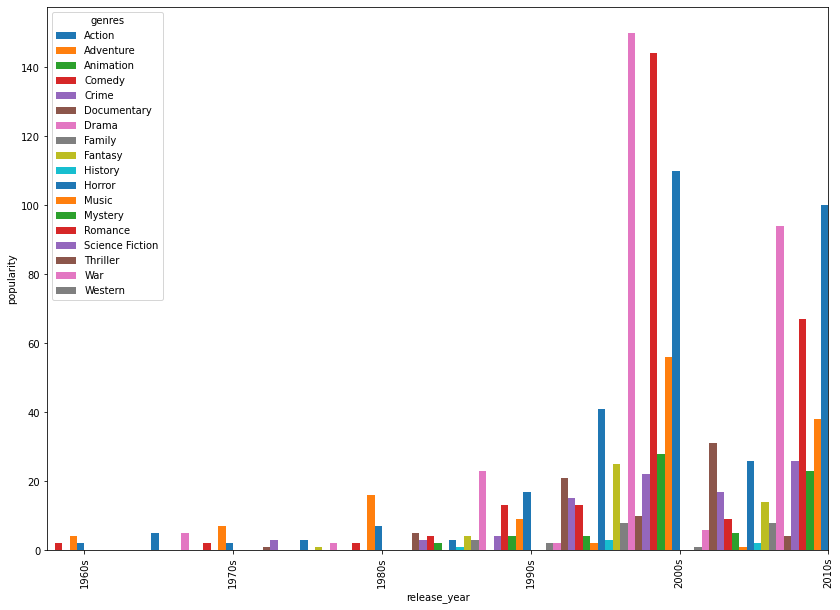

In [80]:
fig, ax = plt.subplots(figsize=(14,10))
df.groupby(["release_year","genres"])['popularity'].size().unstack().plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('popularity');

### Research Question 2  (Which Genres have The Highest average Revenue over Decades?)

In [81]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1960s,6.455884e+08,6.930339e+08,NaN,1.810679e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970s,4.127977e+08,9.646533e+08,NaN,4.643701e+08,NaN,NaN,7.732088e+08,NaN,NaN,NaN,5.097712e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980s,9.065979e+07,4.721432e+08,NaN,4.343464e+08,NaN,NaN,3.194221e+08,NaN,6.196634e+08,NaN,3.986553e+07,NaN,NaN,NaN,6.618831e+08,1.741984e+08,NaN,NaN
1990s,1.896920e+08,6.601854e+08,5.639794e+08,1.343173e+08,1.447832e+08,NaN,2.572276e+08,6.942527e+08,1.730384e+08,1.960861e+08,1.786824e+08,NaN,2.730498e+07,3.685544e+08,1.004535e+08,1.589269e+08,NaN,NaN
2000s,1.860770e+08,4.464922e+08,3.881480e+08,1.064945e+08,7.311983e+07,2.447836e+07,9.768604e+07,2.795444e+08,3.022301e+08,1.013229e+08,8.172580e+07,3.796679e+07,4.932263e+07,1.068541e+08,2.057858e+08,1.797027e+08,1.353780e+07,9.682007e+07
2010s,3.108455e+08,3.478543e+08,3.425381e+08,8.878601e+07,9.550094e+07,3.522698e+07,7.542016e+07,2.666794e+08,2.630345e+08,1.632824e+08,6.864986e+07,1.458037e+08,9.309220e+07,1.007281e+08,4.027925e+08,8.286669e+07,2.268953e+08,4.903142e+08


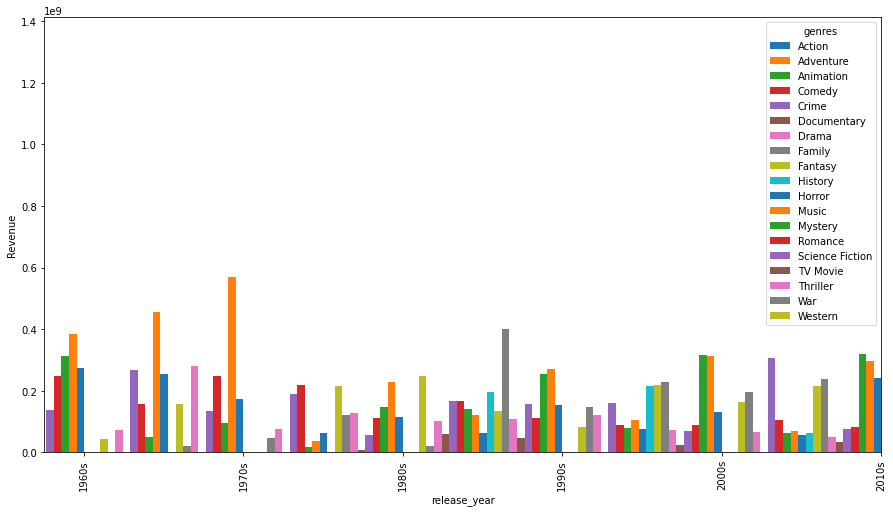

In [112]:


fig, ax = plt.subplots(figsize=(15,8))
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean).\
plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('Revenue');



### This question's clarified The Highest Grossing Revenue for each decade:

1960s: Adventure, Animation, Action.

1970s: Adventure, Music, Drama.

1980s: Adventure, Romance, Fantasy.

1990s: Family, Adventure, Western, Animation.

2000s: Animation, Adventure, Family.

2010s: Animation, science fiction, Adventure.

### Research Question 3  (Is there a Correlation between Revenue and Popularity?)

In [85]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,5562,6.5,2010s,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,6185,7.1,2010s,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2480,6.3,2010s,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,5292,7.5,2010s,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,2947,7.3,2010s,1.747999e+08,1.385749e+09


In [86]:
df['popularity'].corr(df['revenue'])

0.5947547264830623

In [87]:
corr_matrix = df[df['revenue'] != 0].corr()

In [88]:
corr_matrix 

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
popularity,1.000000,0.432791,0.594755,0.322390,0.744088,0.355904,0.419863,0.549299
budget,0.432791,1.000000,0.706888,0.337373,0.583038,0.075168,0.985112,0.566835
revenue,0.594755,0.706888,1.000000,0.371226,0.775374,0.296501,0.713706,0.913802
runtime,0.322390,0.337373,0.371226,1.000000,0.426505,0.385210,0.361985,0.371980
vote_count,0.744088,0.583038,0.775374,0.426505,1.000000,0.464812,0.572798,0.703183
vote_average,0.355904,0.075168,0.296501,0.385210,0.464812,1.000000,0.088272,0.322503
budget_adj,0.419863,0.985112,0.713706,0.361985,0.572798,0.088272,1.000000,0.613093
revenue_adj,0.549299,0.566835,0.913802,0.371980,0.703183,0.322503,0.613093,1.000000


In [89]:
corr_matrix['revenue'].sort_values(ascending=False)

revenue         1.000000
revenue_adj     0.913802
vote_count      0.775374
budget_adj      0.713706
budget          0.706888
popularity      0.594755
runtime         0.371226
vote_average    0.296501
Name: revenue, dtype: float64

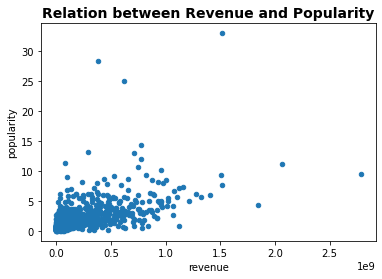

In [98]:
df.plot(kind='scatter',x='revenue',y='popularity')
plt.title('Relation between Revenue and Popularity', 
          fontsize = 14, 
          weight = "bold")
plt.xlabel('revenue')
plt.ylabel('popularity')
plt.show()

There're a positive correlation between popularity and revenue.

Meaning The popularity of a movie indicates it'd return a higher revenue

proper Marketing for the movie is highly recommended.

### Research Question 4  (Correlation between Budget & Revenue?)

In [99]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
popularity,1.000000,0.432791,0.594755,0.322390,0.744088,0.355904,0.419863,0.549299
budget,0.432791,1.000000,0.706888,0.337373,0.583038,0.075168,0.985112,0.566835
revenue,0.594755,0.706888,1.000000,0.371226,0.775374,0.296501,0.713706,0.913802
runtime,0.322390,0.337373,0.371226,1.000000,0.426505,0.385210,0.361985,0.371980
vote_count,0.744088,0.583038,0.775374,0.426505,1.000000,0.464812,0.572798,0.703183
vote_average,0.355904,0.075168,0.296501,0.385210,0.464812,1.000000,0.088272,0.322503
budget_adj,0.419863,0.985112,0.713706,0.361985,0.572798,0.088272,1.000000,0.613093
revenue_adj,0.549299,0.566835,0.913802,0.371980,0.703183,0.322503,0.613093,1.000000


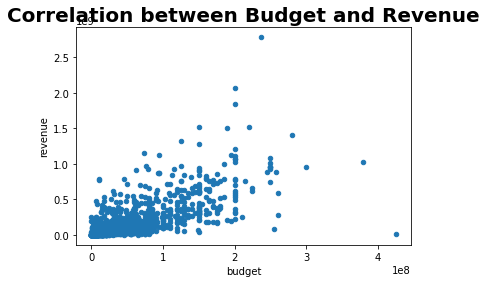

In [103]:
df.plot(kind='scatter',x='budget',y='revenue')
plt.title('Correlation between Budget and Revenue',
         fontsize=20,
         weight='bold')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.show()

There're positive correlations between the two factors

Meaning a proper budget's a vital reason for movie's success.

### Research Question 5  (Most Popular Cast members in Highest Grossing Movies)

In [104]:
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,5562,6.5,2010s,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,6185,7.1,2010s,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2480,6.3,2010s,1.012000e+08,2.716190e+08


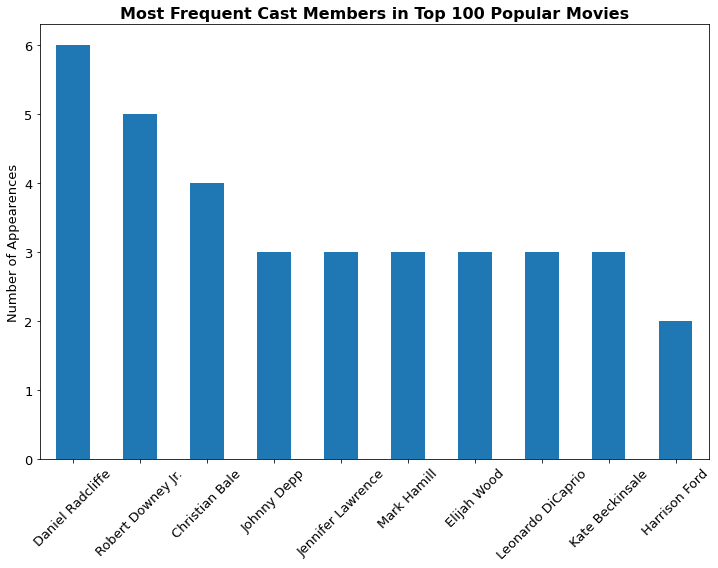

In [105]:
# Counting most frequent cast members in top 100 popular movies:
top_100_df = df.sort_values(by='popularity', ascending=False).head(100)
top_100_cast = pd.Series(top_100_df['cast'].str.cat(sep='|').split('|'))
frequent_cast_in_top_100 = top_100_cast.value_counts(ascending=False).head(10)
frequent_cast_in_top_100.plot(kind='bar', figsize=(12, 8));
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.ylabel("Number of Appearences", fontsize = 13) #add a title for the y-axis
plt.title("Most Frequent Cast Members in Top 100 Popular Movies", fontsize = 16, fontweight = "bold") #add and format the title for the chart
plt.show()

As indicated from the figure the most popular Actors appear in Multiple popular Movies

Meaning only the appearance of one of them's important aspect in movie's success

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

